In [0]:
import numpy as np
import cv2
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers.core import Activation
from sklearn.datasets import fetch_mldata
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [40]:
print('Loading MNIST Dataset...')
dataset = fetch_mldata('MNIST Original')

# Read the MNIST data as array of 784 pixels and convert to 28x28 image matrix 
mnist_data = dataset.data.reshape((dataset.data.shape[0], 28, 28))
mnist_data = mnist_data[:, np.newaxis, :, :]

# Split data into testing and training sets.
train_img, test_img, train_labels, test_labels = train_test_split(mnist_data/255.0, dataset.target.astype("int"), test_size=0.1)

# Each image rows and columns are of 28x28 matrix type.
img_rows, img_columns = 28, 28

# Transform training and testing data to 10 classes in range [0,classes] ; num. of classes = 0 to 9 = 10 classes
total_classes = 10			# 0 to 9 labels
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

#train_img, val_img, train_labels, val_labels = train_test_split(train_img, dataset.target.astype("int"), test_size=0.1)
train_X,valid_X,train_label,valid_label = train_test_split(train_img, train_labels, test_size=0.2, random_state=13)

Loading MNIST Dataset...


In [0]:
num_classes = 10

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(1,28,28)))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))         
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))     
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [45]:
train_model = model.fit(train_X, train_label, batch_size=256,epochs=20,verbose=1, validation_data=(valid_X, valid_label))

Train on 50400 samples, validate on 12600 samples
Epoch 1/20
50400/50400 [==============================] - 4s 73us/step - loss: 0.8104 - acc: 0.7278 - val_loss: 0.1856 - val_acc: 0.9461
Epoch 2/20
50400/50400 [==============================] - 3s 65us/step - loss: 0.2612 - acc: 0.9197 - val_loss: 0.1230 - val_acc: 0.9618
Epoch 3/20
50400/50400 [==============================] - 3s 63us/step - loss: 0.1931 - acc: 0.9411 - val_loss: 0.0927 - val_acc: 0.9717
Epoch 4/20
50400/50400 [==============================] - 3s 65us/step - loss: 0.1604 - acc: 0.9506 - val_loss: 0.0799 - val_acc: 0.9751
Epoch 5/20
38400/50400 [=====================>........] - ETA: 0s - loss: 0.1400 - acc: 0.9564

50400/50400 [==============================] - 3s 65us/step - loss: 0.1393 - acc: 0.9570 - val_loss: 0.0729 - val_acc: 0.9762
Epoch 6/20
50400/50400 [==============================] - 3s 65us/step - loss: 0.1254 - acc: 0.9617 - val_loss: 0.0653 - val_acc: 0.9787
Epoch 7/20
50400/50400 [==============================] - 3s 66us/step - loss: 0.1156 - acc: 0.9655 - val_loss: 0.0616 - val_acc: 0.9802
Epoch 8/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.1047 - acc: 0.9686 - val_loss: 0.0572 - val_acc: 0.9817
Epoch 9/20
50400/50400 [==============================] - 3s 66us/step - loss: 0.0989 - acc: 0.9694 - val_loss: 0.0498 - val_acc: 0.9833
Epoch 10/20
 9984/50400 [====>.........................] - ETA: 2s - loss: 0.0970 - acc: 0.9677

50400/50400 [==============================] - 3s 67us/step - loss: 0.0911 - acc: 0.9722 - val_loss: 0.0478 - val_acc: 0.9838
Epoch 11/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.0886 - acc: 0.9728 - val_loss: 0.0475 - val_acc: 0.9848
Epoch 12/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.0857 - acc: 0.9747 - val_loss: 0.0464 - val_acc: 0.9847
Epoch 13/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.0820 - acc: 0.9738 - val_loss: 0.0432 - val_acc: 0.9852
Epoch 14/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.0786 - acc: 0.9765 - val_loss: 0.0428 - val_acc: 0.9853
Epoch 15/20
 3328/50400 [>.............................] - ETA: 2s - loss: 0.0802 - acc: 0.9769

50400/50400 [==============================] - 3s 66us/step - loss: 0.0756 - acc: 0.9771 - val_loss: 0.0418 - val_acc: 0.9865
Epoch 16/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.0741 - acc: 0.9773 - val_loss: 0.0394 - val_acc: 0.9864
Epoch 17/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.0721 - acc: 0.9778 - val_loss: 0.0368 - val_acc: 0.9890
Epoch 18/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.0675 - acc: 0.9785 - val_loss: 0.0371 - val_acc: 0.9875
Epoch 19/20
50400/50400 [==============================] - 3s 67us/step - loss: 0.0656 - acc: 0.9797 - val_loss: 0.0368 - val_acc: 0.9879
Epoch 20/20
 4096/50400 [=>............................] - ETA: 2s - loss: 0.0721 - acc: 0.9775

50400/50400 [==============================] - 3s 67us/step - loss: 0.0660 - acc: 0.9796 - val_loss: 0.0364 - val_acc: 0.9880


In [0]:
model.save("Save_trained_model.h5py")

In [48]:
test_eval = model.evaluate(test_img, test_labels, verbose=1)

7000/7000 [==============================] - 1s 96us/step


In [49]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.038550734930139566
Test accuracy: 0.9891428571428571


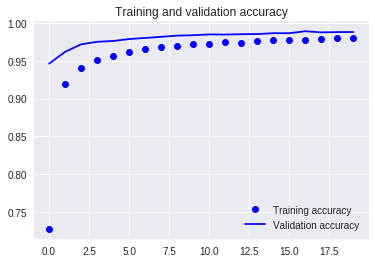

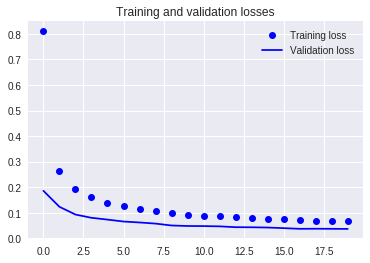

In [51]:
accuracy = train_model.history['acc']
validity_accuracy = train_model.history['val_acc']
loss = train_model.history['loss']
validity_loss = train_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, validity_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validity_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend()
plt.show()



In [64]:
predicted_classes = model.predict(test_img)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_labels.shape


((7000,), (7000, 10))